# Problem statement: Understanding customer profile for Aerofit Treadmills

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [6]:
df = pd.read_csv('./Aerofit.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# Basic structure & characteristics of the dataset

#### Shape of data

In [34]:
df.shape

(180, 9)

#### Information on dataframe

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Number of null values

In [36]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#### Basic statistics of Data

In [37]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


# Value Counts and Unique Attributes

#### Categorical Columns

In [38]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [39]:
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [40]:
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

#### Numerical/Continious Columns

In [41]:
df['Age'].nunique()

32

In [42]:
df['Education'].nunique()

8

In [43]:
df['Usage'].nunique()

6

In [44]:
df['Fitness'].nunique()

5

In [45]:
df['Income'].nunique()

62

In [46]:
df['Miles'].nunique()

37

# Exploratory Data Analysis

## Univariate Analysis

### Categorical Variables (With Marginal Probablity)

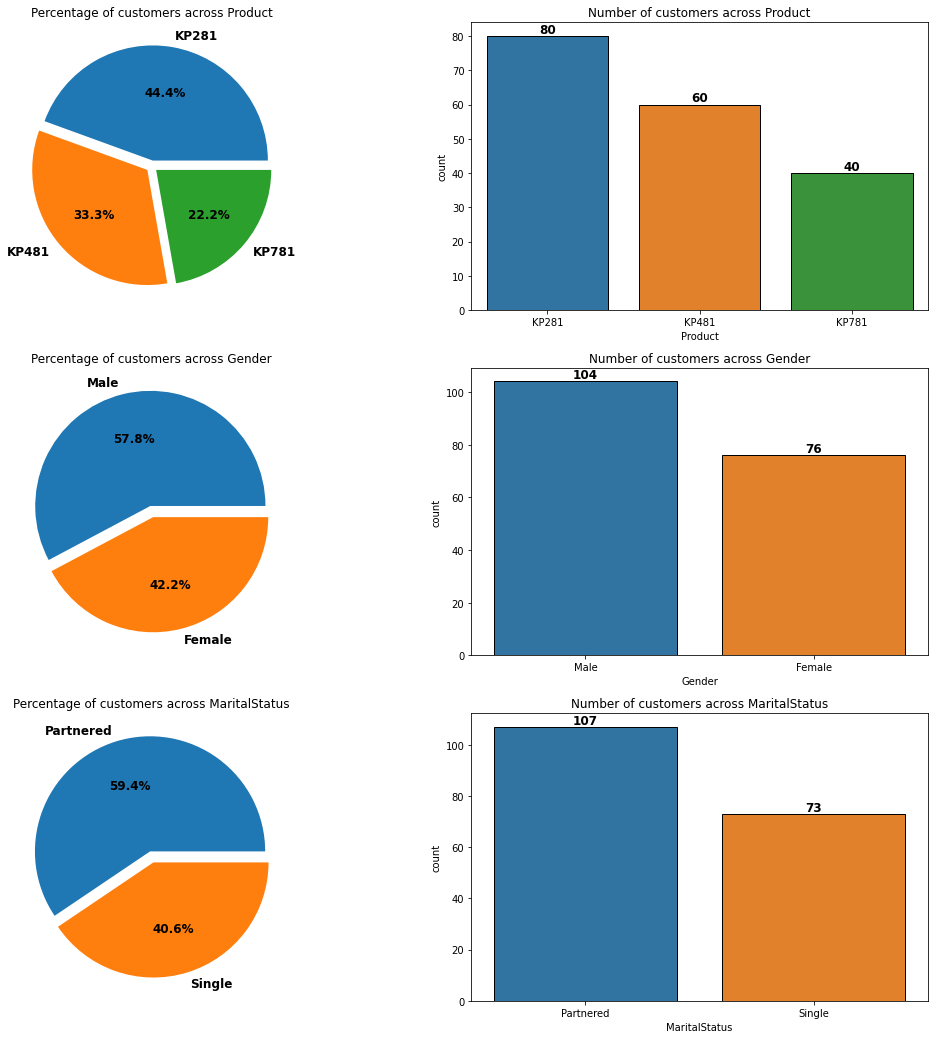

In [47]:
categories = ['Product', 'Gender', 'MaritalStatus']
fig = plt.figure(figsize=(18,18))
id=1
for feature in categories:
    plt.subplot(3,2,id)
    plt.pie(df[feature].value_counts(), labels = df[feature].value_counts().index, explode = (0.05, )*len(df[feature].value_counts()), autopct='%.1f%%', textprops = {'fontweight':'bold', 'fontsize':12})
    plt.title(f'Percentage of customers across {feature}', fontsize=12)
    
    plt.subplot(3,2,id+1)
    f = sns.countplot(data=df, x = feature, edgecolor = 'black', order = df[feature].value_counts().index)
    for item in f.containers:
        f.bar_label(item, fontsize=12, fontweight='bold')
    plt.title(f'Number of customers across {feature}', fontsize=12)
    id += 2
    

Observations
 - Treadmills sold by Aerofit: 3 Models of Treadmills available
     - KP281: 44.4%
     - KP481: 33.3%
     - KP781: 22.2%
 - Customer Gender 
     - Males: 57.8%
     - Females: 42.2%
 - Customer Marital Status
      - Partnered customers: 59.4%
      - Single customers: 40.6%

### Continious or Numerical Variables (Histogtam & Outlier Check)

In [48]:
continious_feature = {'Age': 3, 'Education': 2, 'Usage': 1, 'Fitness': 1, 'Income': 10000, 'Miles': 30}

#### Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

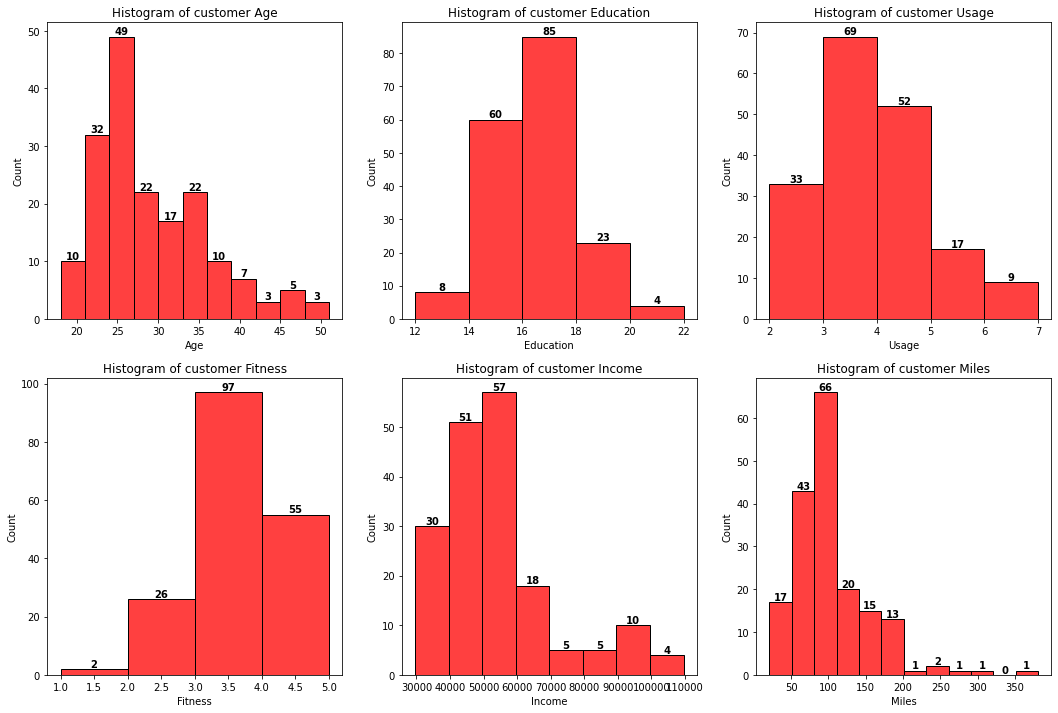

In [49]:
fig = plt.figure(figsize=(18,12))
id = 1

for feature in continious_feature:
    plt.subplot(2,3, id)
    p = sns.histplot(df[feature], binwidth = continious_feature[feature], color = 'r' )
    for item in p.containers:
        p.bar_label(item, fontsize=10, fontweight='bold')
    plt.title(f'Histogram of customer {feature}', fontsize = 12)
    id+=1
plt.show

Observations

 - Customer Age
    - Majority of customers lies between 20-35 year age
 - Customer Education
    - Majority of customers have 14-18 years of education
 - Customer Usage
    - Majority customers think their average usage would be 2-5 hours a week
 - Customer Fitness
    - Majority of the customers rated themselves a 3 (Average) in Fitness
 - Customer Income
    - Majority of the customers have an annual income in between 30000-70000 USD
 - Customer Miles
    - Majority of the customers thought that they would walk/run on the treadmill for 50-110 miles

### Box-Plot and Outlier check

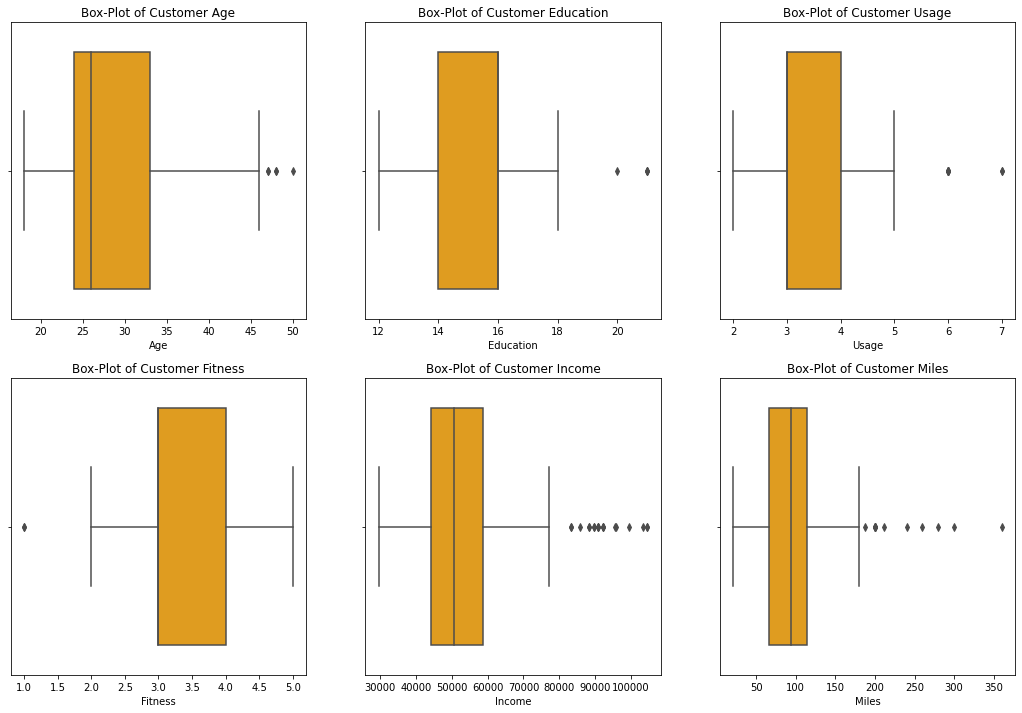

In [50]:
fig = plt.figure(figsize = (18,12))
id=1

for feature in continious_feature:
    plt.subplot(2, 3, id)
    sns.boxplot(x = df[feature], color = 'orange')
    plt.title(f'Box-Plot of Customer {feature}', fontsize=12)
    id+=1
plt.show()

#### Detecting Outliers

In [51]:
for feature in continious_feature:
    median = np.percentile(df[feature], 50)
    iqr = np.percentile(df[feature], 75) - np.percentile(df[feature], 25)
    lower = np.percentile(df[feature], 25) - 1.5*iqr
    upper = np.percentile(df[feature], 75) + 1.5*iqr
    print(f'{feature}: Median = {median}, Lower = {lower}, Upper = {upper}')

Age: Median = 26.0, Lower = 10.5, Upper = 46.5
Education: Median = 16.0, Lower = 11.0, Upper = 19.0
Usage: Median = 3.0, Lower = 1.5, Upper = 5.5
Fitness: Median = 3.0, Lower = 1.5, Upper = 5.5
Income: Median = 50596.5, Lower = 22144.875, Upper = 80581.875
Miles: Median = 94.0, Lower = -7.125, Upper = 187.875


Observations

 - Customer Age
    - Median: 26 years
    - Outliers above: 46.5 years
 - Customer Education
    - Median: 16 years
    - Outliers above: 19 years
 - Customer Usage
    - Median: 3 times
    - Outliers above: 5.5 times
 - Customer Fitness
    - Median: 3
    - Outliers below: 1.5
 - Customer Income
    - Median: 50,596 USD
    - Outliers above: 80,582 USD
 - Customer Miles
    - Median: 94 miles
    - Outliers above: 187.8 miles

### Outlier Check: Setup outlier to the upper and lower whisker

In [52]:
df_new = df.copy()
df_new.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [53]:
df.loc[df['Age']>46.5, 'Age'] = 46
df.loc[df['Education']>19, 'Education'] = 19
df.loc[df['Usage']>5.5, 'Usage'] = 5
df.loc[df['Fitness'] < 1.5, 'Fitness'] = 2
df.loc[df['Income'] > 80581, 'Income'] = 80581
df.loc[df['Miles'] > 187, 'Miles'] = 187

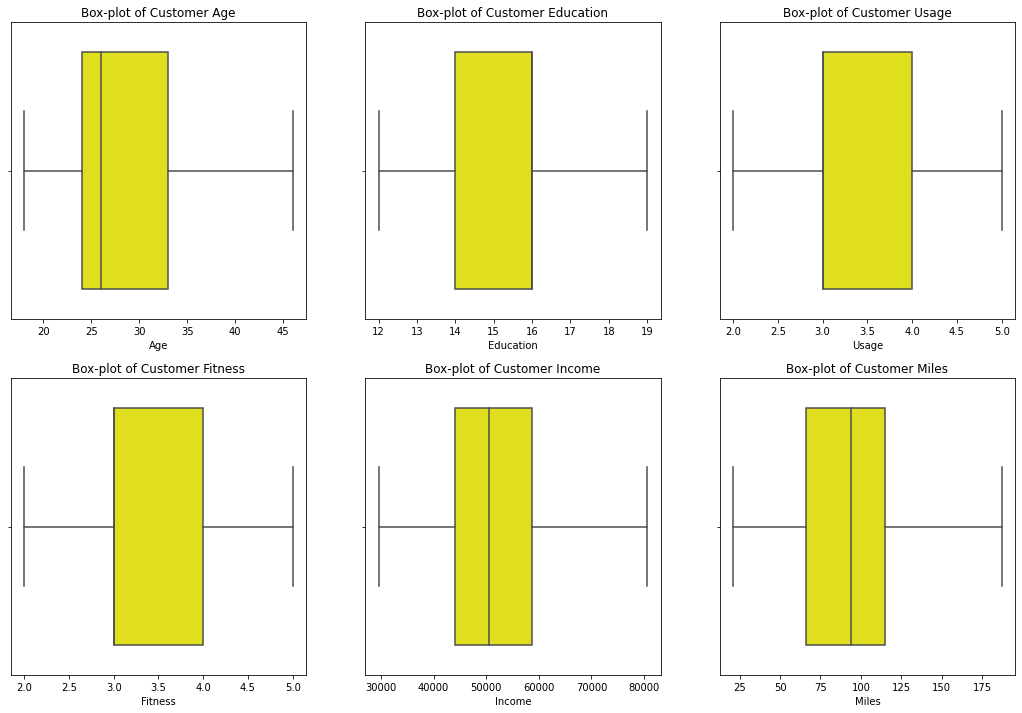

In [54]:
fig = plt.figure(figsize=(18, 12))
id = 1
for feature in continious_feature:
    plt.subplot(2, 3, id)
    sns.boxplot(x=df[feature], color='yellow')
    plt.title(f'Box-plot of Customer {feature}', fontsize=12)
    id += 1
plt.show()

# Bivariate Analysis

In [55]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Number of Treadmills sold

   - Accross Product and Gender
   - Accross Product & Maritial Status

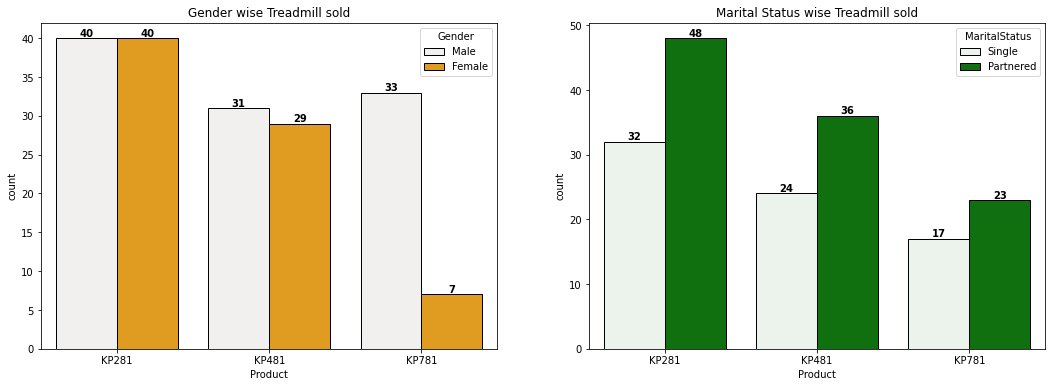

In [56]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
f = sns.countplot(data = df, x ='Product', hue = 'Gender', edgecolor = 'black', color = 'orange')
for item in f.containers:
    f.bar_label(item, fontsize = 10, fontweight = 'bold')
plt.title('Gender wise Treadmill sold')
plt.subplot(1,2,2)
f1 = sns.countplot(data = df, x ='Product', hue = 'MaritalStatus', edgecolor = 'black', color = 'Green')
for item in f1.containers:
    f1.bar_label(item, fontsize = 10, fontweight = 'bold')
plt.title('Marital Status wise Treadmill sold')

plt.show()

Observations
 - Gender vs Product sales
     - KP281: equally bought b/w males & females
     - KP481: nearly equally bought b/w males & females
     - KP781: Most customers are male
 - Marital Status vs Product Sales
     - KP281 model is the highest selling model for both single and partnered

## Studying the Continuous Features across Products
 - KDE plots
 - Box plots
 - Median of continuous features

#### KDE and Boxplot

In [57]:
continious_feature = {'Age': 3, 'Education': 2, 'Usage': 1, 'Fitness': 1, 'Income': 10000, 'Miles': 30}

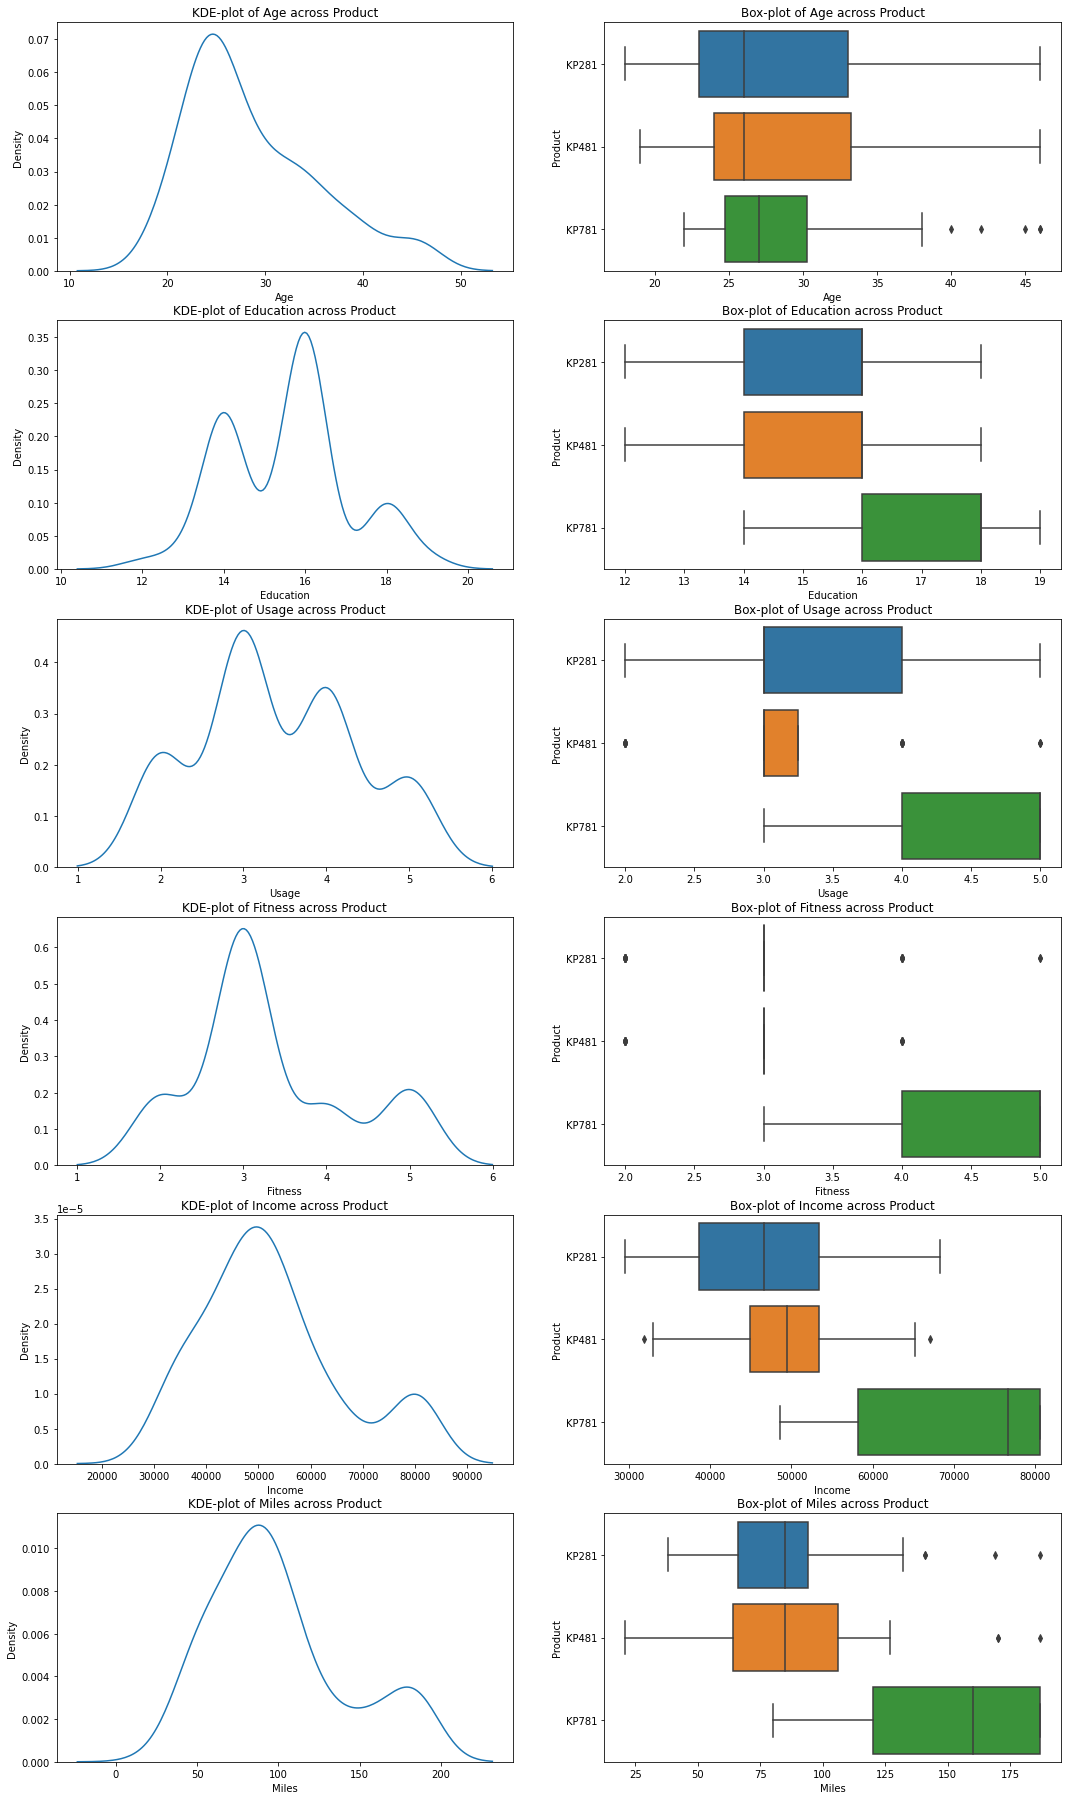

In [58]:
fig=plt.figure(figsize=(18, 32))
id = 1

for feature in continious_feature:
    plt.subplot(6, 2, id)
    #sns.kdeplot(df[feature], hue = df['Product'])
    sns.kdeplot(df[feature]) # KDE
    plt.title(f'KDE-plot of {feature} across Product')
    
    plt.subplot(6, 2, id + 1)
    sns.boxplot(data=df, x=feature, y = 'Product') # Boxplot
    plt.title(f'Box-plot of {feature} across Product')
    
    id+=2
    
#fig.suptitle('Continuous features across Product', fontsize=14)    
plt.show()

### Median of continious columns

In [59]:
cont_features_lst = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
df.groupby('Product')[cont_features_lst].agg('median').reset_index()

,Product,Age,Education,Usage,Fitness,Income,Miles
0,KP281,26.0,16.0,3.0,3.0,46617.0,85.0
1,KP481,26.0,16.0,3.0,3.0,49459.5,85.0
2,KP781,27.0,18.0,5.0,5.0,76568.5,160.0


Observations:
 1. From KDE plots: The features which impact the choice of buying a specific product are: Education, Usage, Fitness, Income and Miles
 2. Given that the products in question are fitness products, the top features which affect the choice of buying would be:
    Income
    Fitness
    Usage
    Miles
 3. We observe that KP281 and KP481 are similar in many ways when it comes to the customer profile (as per the features shown above)
 4. KP781 differs from the other 2 products substantially when it comes to the customer Education, Usage, Fitness, Income and Miles


 - Age:
   - Median Age across three type of product are same
 - Income:
   - KP281: Median customer income 46.617k USD
   - KP481: Median customer income 49.46k USD
   - KP781: Median customer income 76.6k USD
 - Education:
   - KP281, KP481: The median number of years in education is 16
   - KP781: The median number of years in education is 18
 - Usage:
   - KP281: The median usage is 3 times per week, some customers have reported other usages as well
   - KP481: All the customers reported their expected usage as 3 times a week barring a few
   - KP781: The median usage is 5 times per week
 - Fitness:
   - KP281, KP481: The median fitness is 3 times per week, some customers have reported other usages as well
   - KP781: The median fitness is 5 (customers already think they are very fit and hence they probably invested in an expensive product)
 - Miles:
   - KP281, KP481: The median miles customer expects to walk/run is 85
   - KP781: The median miles customer expects to walk/run is 160, almost 2X of the other 2

## Multivariate Analysis

In [60]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [61]:
df_cor = df.drop(['Product', 'Gender', 'MaritalStatus'], axis=1)
df_cor.head()

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47


In [62]:
df_cor.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.296565,0.015552,0.058312,0.542205,0.024419
Education,0.296565,1.000000,0.391276,0.439050,0.646931,0.362209
Usage,0.015552,0.391276,1.000000,0.660556,0.460975,0.778043
Fitness,0.058312,0.439050,0.660556,1.000000,0.522897,0.832547
Income,0.542205,0.646931,0.460975,0.522897,1.000000,0.506504
Miles,0.024419,0.362209,0.778043,0.832547,0.506504,1.000000


<Axes: >

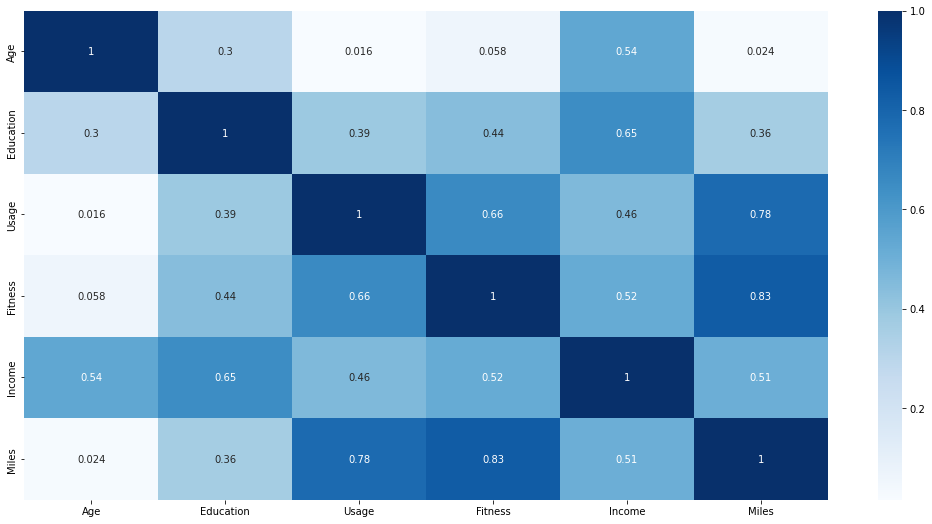

In [63]:
plt.figure(figsize = (18, 9))
sns.heatmap(data = df_cor.corr(), cmap = 'Blues', annot = True)

Observations:
    
 The feature combinations which have high correlation are:
 - Age, Income
 - Education, Income
 - Usage, Fitness
 - Usage, Miles
 - Fitness, Income
 - Fitness, Miles
 - Income, Miles
 
We must keep in mind that we are trying to create a customer profile for the different treadmill products. Keeping that objective in mind, we realise that some of the above pairs may not be relevant from the context of business. Thus we do not explore those. However, we will look in depth at the following:
 
 - Age vs Income
 - Usage vs Fitness
 - Usage vs Miles
 - Fitness vs Miles

In [64]:
gender_marStat = {'Gender': ['Male', 'Female'], 'MaritalStatus': ['Single', 'Partnered']}

## Age vs Income

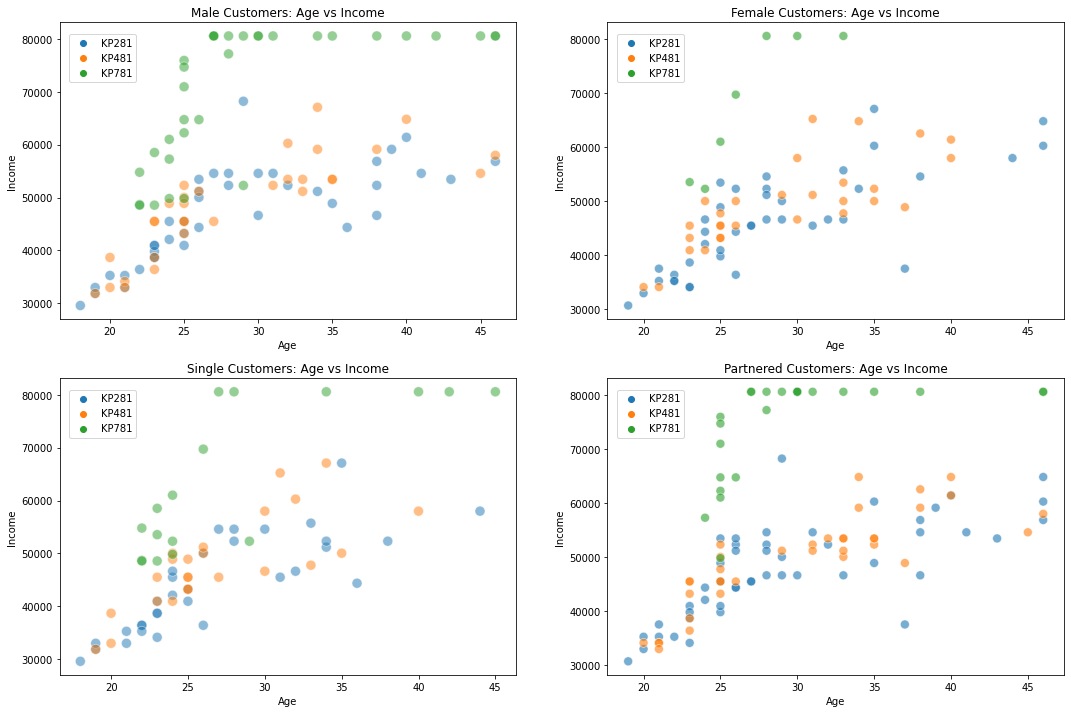

In [65]:
fig = plt.figure(figsize = (18,12))
id=1
for feature in gender_marStat:
    df_filter = df.loc[df[feature] == gender_marStat[feature][0]]
    plt.subplot(2,2,id)
    sns.scatterplot(data = df_filter, x = 'Age', y = 'Income', hue = 'Product', s=100, alpha = 0.5)
    plt.legend(loc=(0.02,0.8))
    plt.title(f'{gender_marStat[feature][0]} Customers: Age vs Income')
    
    df_filter1 = df.loc[df[feature] == gender_marStat[feature][1]]
    plt.subplot(2,2,id+1)
    sns.scatterplot(data=df_filter1, x='Age', y='Income', hue = 'Product', s=80, alpha=0.6)
    plt.legend(loc=(0.02,0.8))
    plt.title(f'{gender_marStat[feature][1]} Customers: Age vs Income')
    id+=2

Observations:
   - We see a positive correlation b/w Age and Income
   - This is to be expected since the income of a person usually increases as he keeps working in his job
   - We also see that people whose income > 50,000 USD tend to go for the KP781
   - We see a lot of data points where income = 80,000 USD (This is because of the oulier treatment)
      - Number of males who earn >= 80,000 USD is more than that of females

## Usage vs Fitness

In [66]:
gender_marStat

{'Gender': ['Male', 'Female'], 'MaritalStatus': ['Single', 'Partnered']}

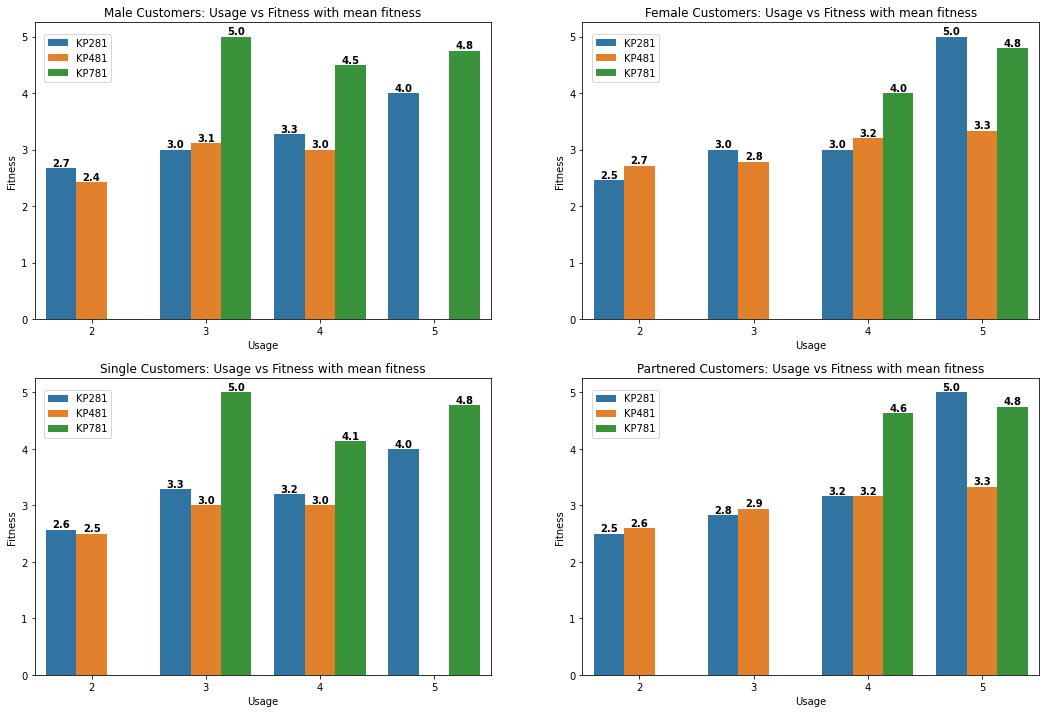

In [67]:
fig = plt.figure(figsize=(18,12))
id=1

for feature in gender_marStat:
    df_filter = df.loc[df[feature] == gender_marStat[feature][0]]
    plt.subplot(2,2,id)
    f = sns.barplot(data = df_filter, x='Usage', y='Fitness', hue='Product', estimator = np.mean, errorbar=None)
    for item in f.containers:
        f.bar_label(item, fontsize=10, fontweight='bold', fmt = '%.1f')
    plt.legend(loc=(0.02,0.8))
    plt.title(f'{gender_marStat[feature][0]} Customers: Usage vs Fitness with mean fitness')
    
    df_filter1 = df.loc[df[feature] == gender_marStat[feature][1]]
    plt.subplot(2,2,id+1)
    f = sns.barplot(data = df_filter1, x='Usage', y='Fitness', hue='Product', estimator = np.mean, errorbar=None)
    for item in f.containers:
        f.bar_label(item, fontsize=10, fontweight='bold', fmt = '%.1f')
    plt.legend(loc=(0.02,0.8))
    plt.title(f'{gender_marStat[feature][1]} Customers: Usage vs Fitness with mean fitness')
    
    id+=2

Observations:
  - There is a positive correlation b/w usage and fitness
  - Usally people with higher usage have a higher mean fitness(Normal)
  - We also observe that people who have opted for the KP781 are more fit

### Usage vs Miles

In [68]:
gender_marStat

{'Gender': ['Male', 'Female'], 'MaritalStatus': ['Single', 'Partnered']}

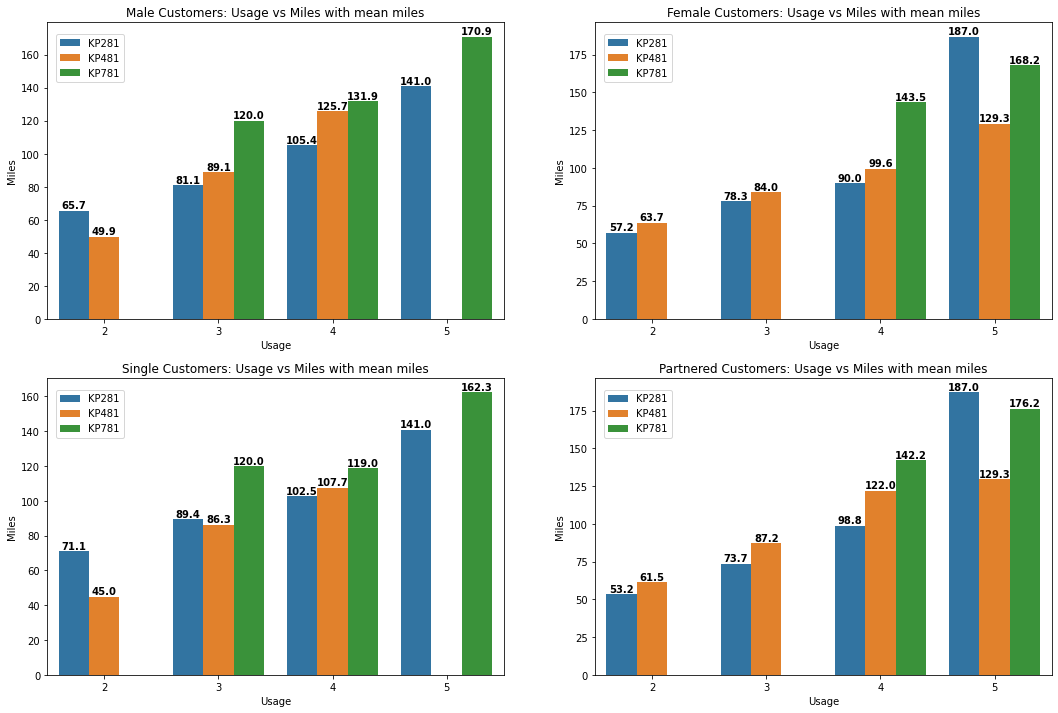

In [69]:
fig = plt.figure(figsize=(18,12))
id=1

for feature in gender_marStat:
    df_filter = df.loc[df[feature] == gender_marStat[feature][0]]
    plt.subplot(2,2,id)
    f = sns.barplot(data = df_filter, x='Usage', y='Miles', hue='Product', estimator = np.mean, errorbar=None)
    for item in f.containers:
        f.bar_label(item, fontsize=10, fontweight='bold', fmt = '%.1f')
    plt.legend(loc=(0.02,0.8))
    plt.title(f'{gender_marStat[feature][0]} Customers: Usage vs Miles with mean miles')
    
    df_filter1 = df.loc[df[feature] == gender_marStat[feature][1]]
    plt.subplot(2,2,id+1)
    f = sns.barplot(data = df_filter1, x='Usage', y='Miles', hue='Product', estimator = np.mean, errorbar=None)
    for item in f.containers:
        f.bar_label(item, fontsize=10, fontweight='bold', fmt = '%.1f')
    plt.legend(loc=(0.02,0.8))
    plt.title(f'{gender_marStat[feature][1]} Customers: Usage vs Miles with mean miles')
    
    id+=2

Observations:
 - There are positive correlation between Usage and Miles
 - People with higher usage tends to cover higher Miles
 - Mostly KP281 is used

### Fitness vs Miles

In [70]:
gender_marStat

{'Gender': ['Male', 'Female'], 'MaritalStatus': ['Single', 'Partnered']}

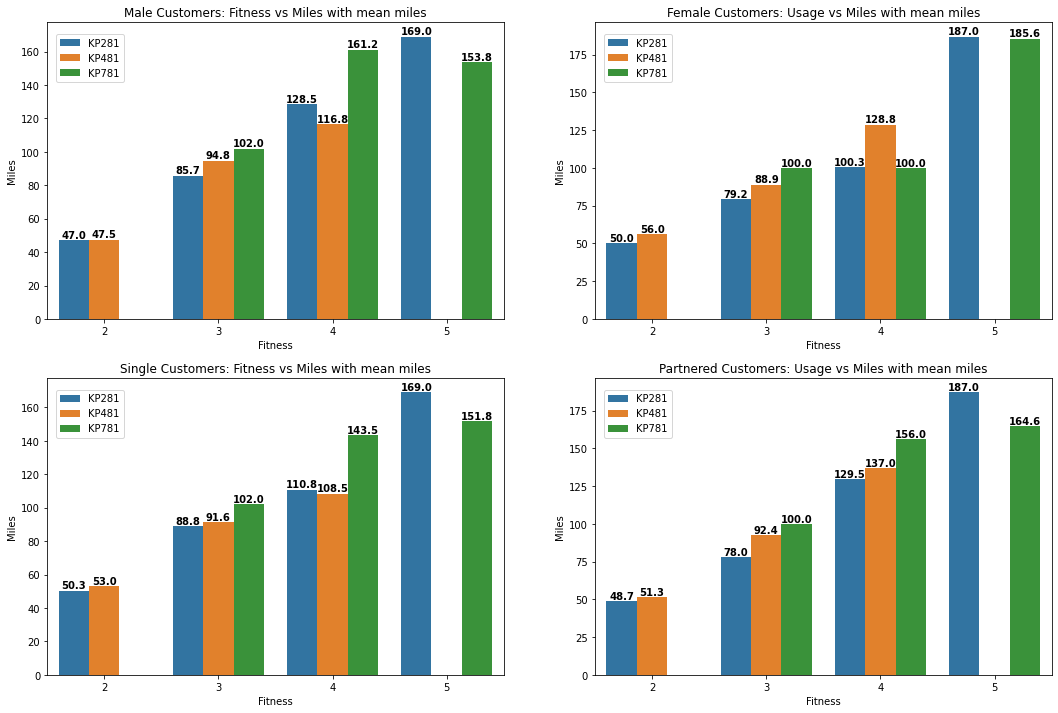

In [71]:
fig = plt.figure(figsize=(18,12))
id=1

for feature in gender_marStat:
    df_filter = df.loc[df[feature] == gender_marStat[feature][0]]
    plt.subplot(2,2,id)
    f = sns.barplot(data = df_filter, x='Fitness', y='Miles', hue='Product', estimator = np.mean, errorbar=None)
    for item in f.containers:
        f.bar_label(item, fontsize=10, fontweight='bold', fmt = '%.1f')
    plt.legend(loc=(0.02,0.8))
    plt.title(f'{gender_marStat[feature][0]} Customers: Fitness vs Miles with mean miles')
    
    df_filter1 = df.loc[df[feature] == gender_marStat[feature][1]]
    plt.subplot(2,2,id+1)
    f = sns.barplot(data = df_filter1, x='Fitness', y='Miles', hue='Product', estimator = np.mean, errorbar=None)
    for item in f.containers:
        f.bar_label(item, fontsize=10, fontweight='bold', fmt = '%.1f')
    plt.legend(loc=(0.02,0.8))
    plt.title(f'{gender_marStat[feature][1]} Customers: Usage vs Miles with mean miles')
    
    id+=2

Observations:
 - There is a positive correlation between fitness and miles
 - Fitness and Miles are directly proportional to each other

# Customer Profiling - Categorization of users & Probability- marginal, conditional probability

## Converting continuous columns into categorical columns
 - Age
 - Income
 - Miles

In [72]:
df_profile = df.copy()

In [73]:
df_profile.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [74]:
age_33 = np.percentile(df['Age'], 33)
age_67 = np.percentile(df['Age'], 67)

income_33 = np.percentile(df['Income'], 33)
income_67 = np.percentile(df['Income'], 67)

miles_33 = np.percentile(df['Miles'], 33)
miles_67 = np.percentile(df['Miles'], 67)

#### We create 3 categories for age, income and miles

 - Age:
    - Below 25 years
    - 25-30 years
    - Above 30 years
 - Income:
    - Low: Below 45480 USD
    - Medium: 45480 USD - 54576 USD
    - High: Above 54576 USD
 - Miles:
    - Low: Below 80 miles
    - Medium: 80-106 miles
    - Above 106 miles


In [75]:
df_profile['Age_Category'] = pd.cut(df['Age'], bins=[df['Age'].min()-5, age_33-1, age_67, df['Age'].max()+5], 
                                    labels=['Below_25', '25-30', 'Above_30'], right=True)
df_profile['Income_Category'] = pd.cut(df['Income'], bins=[df['Income'].min()-1000, income_33, income_67, df['Income'].max()+1000],
                                      labels = ['Low', 'Medium', 'High'], right=True)
df_profile['Miles_Category'] = pd.cut(df['Miles'], bins = [df['Miles'].min()-10, miles_33, miles_67, df['Miles'].max()+10],
                                     labels = ['Low', 'Medium', 'High'], right=True)

In [76]:
df_profile

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Category,Income_Category,Miles_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Below_25,Low,High
1,KP281,19,Male,15,Single,2,3,31836,75,Below_25,Low,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Below_25,Low,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Below_25,Low,Medium
4,KP281,20,Male,13,Partnered,4,2,35247,47,Below_25,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,19,Single,5,5,80581,187,Above_30,High,High
176,KP781,42,Male,18,Single,5,4,80581,187,Above_30,High,High
177,KP781,45,Male,16,Single,5,5,80581,160,Above_30,High,High
178,KP781,46,Male,18,Partnered,4,5,80581,120,Above_30,High,High


In [77]:
df_profile['Age_Category'].value_counts(normalize=True)

Age_Category
25-30       0.366667
Above_30    0.333333
Below_25    0.300000
Name: proportion, dtype: float64

In [78]:
df_profile['Income_Category'].value_counts(normalize=True)

Income_Category
Low       0.350000
Medium    0.344444
High      0.305556
Name: proportion, dtype: float64

In [79]:
df_profile['Miles_Category'].value_counts(normalize=True)

Miles_Category
Medium    0.366667
Low       0.333333
High      0.300000
Name: proportion, dtype: float64

## Product across customer gender

In [80]:
# Gender wise product sales
pd.crosstab(index = df['Product'], columns = df['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


#### Conditional Probablity

In [81]:
print('p[Male/KP281]:', 40/80)
print('p[Female/KP281]:', 40/80)
print(" ")
print('p[Male/KP481]:', 31/60)
print('p[Female/KP481]:', 29/60)
print(" ")
print('p[Male/KP781]:', 33/40)
print('p[Female/KP781]:', 7/40)

p[Male/KP281]: 0.5
p[Female/KP281]: 0.5
 
p[Male/KP481]: 0.5166666666666667
p[Female/KP481]: 0.48333333333333334
 
p[Male/KP781]: 0.825
p[Female/KP781]: 0.175


Observations:
   - Both men and women are equally likely to buy KP281 and KP481
   - Majority of the customer base for KP781 is male

## Product across maritial status

In [82]:
# product sales across maritial status

pd.crosstab(index = df['Product'], columns = df['MaritalStatus'], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


#### Conditional Probablity

In [83]:
print('p[Partnered/KP281]:', 48/80)
print('p[Single/KP281]:', 32/80)
print(" ")
print('p[Partnered/KP481]:', 36/60)
print('p[Single/KP481]:', 24/60)
print(" ")
print('p[Partnered/KP781]:', 23/40)
print('p[Single/KP781]:', 17/40)

p[Partnered/KP281]: 0.6
p[Single/KP281]: 0.4
 
p[Partnered/KP481]: 0.6
p[Single/KP481]: 0.4
 
p[Partnered/KP781]: 0.575
p[Single/KP781]: 0.425


Observations:
 - Partnered customers tend to buy more comape to single customers

## Product Across both Customer Gender & Customer Marital Status

In [84]:
pd.crosstab(index = df['Product'], columns = [df['Gender'], df['MaritalStatus']], margins=True)

Gender           Female             Male         All
MaritalStatus Partnered Single Partnered Single     
Product                                             
KP281                27     13        21     19   80
KP481                15     14        21     10   60
KP781                 4      3        19     14   40
All                  46     30        61     43  180

#### Conditional Probablity

In [85]:
print('P[Male & Single/KP281]:', 19/80)
print('P[Male & Partnered/KP281]:', 21/80)
print('P[Female & Single/KP281]:', 13/80)
print('P[Female & Partnered/KP281]:', 27/80)
print(" ")
print('P[Male & Single/KP481]:', 10/60)
print('P[Male & Partnered/KP481]:', 21/60)
print('P[Female & Single/KP481]:', 14/60)
print('P[Female & Partnered/KP481]:', 15/60)
print(" ")
print('P[Male & Single/KP781]:', 14/40)
print('P[Male & Partnered/KP781]:', 19/40)
print('P[Female & Single/KP781]:', 3/40)
print('P[Female & Partnered/KP781]:', 4/40)
print(" ")

P[Male & Single/KP281]: 0.2375
P[Male & Partnered/KP281]: 0.2625
P[Female & Single/KP281]: 0.1625
P[Female & Partnered/KP281]: 0.3375
 
P[Male & Single/KP481]: 0.16666666666666666
P[Male & Partnered/KP481]: 0.35
P[Female & Single/KP481]: 0.23333333333333334
P[Female & Partnered/KP481]: 0.25
 
P[Male & Single/KP781]: 0.35
P[Male & Partnered/KP781]: 0.475
P[Female & Single/KP781]: 0.075
P[Female & Partnered/KP781]: 0.1
 


Observations:
 - Partnered females are more likely to buy KP281
 - Partnered males are more likely to buy KP481 & KP781

## Product Across Customer Age Category

In [86]:
# Product sales based on Age Category

pd.crosstab(index = df_profile['Product'], columns = df_profile['Age_Category'], margins=True)

Age_Category,Below_25,25-30,Above_30,All
Product,,,,
KP281,27,28,25,80
KP481,17,18,25,60
KP781,10,20,10,40
All,54,66,60,180


#### Conditional Probablity

In [87]:
print('p[Below_25/KP281]:', 27/80)
print('p[25-30/KP281]:', 28/80)
print('p[Above_30/KP281]:', 25/80)
print(' ')
print('p[Below_25/KP481]:', 17/60)
print('p[25-30/KP481]:', 18/60)
print('p[Above_30/KP481]:', 25/60)
print(' ')
print('p[Below_25/KP781]:', 10/40)
print('p[25-30/KP781]:', 20/40)
print('p[Above_30/KP781]:', 10/40)

p[Below_25/KP281]: 0.3375
p[25-30/KP281]: 0.35
p[Above_30/KP281]: 0.3125
 
p[Below_25/KP481]: 0.2833333333333333
p[25-30/KP481]: 0.3
p[Above_30/KP481]: 0.4166666666666667
 
p[Below_25/KP781]: 0.25
p[25-30/KP781]: 0.5
p[Above_30/KP781]: 0.25


Observations:
 - KP281 model is more preferable for below 25 age group & The probability of customer falling in each age bucket is equally likely
 - KP481 is the most preferable choice for Above_30 age group

## Product Across Customer Usage

In [88]:
pd.crosstab(index=df_profile['Product'], columns = df_profile['Usage'], margins = True)

Usage,2,3,4,5,All
Product,,,,,
KP281,19,37,22,2,80
KP481,14,31,12,3,60
KP781,0,1,18,21,40
All,33,69,52,26,180


#### Conditional Probablity

In [89]:
print('P[Usage:2/KP281]:', 19/80)
print('P[Usage:3/KP281]:', 37/80)
print('P[Usage:4/KP281]:', 22/80)
print('P[Usage:5_and_Above/KP281]:', 5/80)
print(' ')
print('P[Usage:2/KP481]:', 14/60)
print('P[Usage:3/KP481]:', 31/60)
print('P[Usage:4/KP481]:', 12/60)
print('P[Usage:5_and_Above/KP481]:', 3/60)
print(' ')
print('P[Usage:2/KP781]:', 0/40)
print('P[Usage:3/KP781]:', 1/40)
print('P[Usage:4/KP781]:', 18/40)
print('P[Usage:5_and_Above/KP781]:', 21/40)
print(' ')

P[Usage:2/KP281]: 0.2375
P[Usage:3/KP281]: 0.4625
P[Usage:4/KP281]: 0.275
P[Usage:5_and_Above/KP281]: 0.0625
 
P[Usage:2/KP481]: 0.23333333333333334
P[Usage:3/KP481]: 0.5166666666666667
P[Usage:4/KP481]: 0.2
P[Usage:5_and_Above/KP481]: 0.05
 
P[Usage:2/KP781]: 0.0
P[Usage:3/KP781]: 0.025
P[Usage:4/KP781]: 0.45
P[Usage:5_and_Above/KP781]: 0.525
 


Observations:
 - Usage 6 & 7 is neglible
 - KP281 & KP481 is the most preferable model for usage group 3
 - KP781 is the most prferable for Usage group 4 & Customers who's usage less than 4 have less probablity to buy this product

## Product Across Customer Fitness

In [90]:
pd.crosstab(index=df_profile['Product'], columns = df_profile['Fitness'], margins = True)

Fitness,2,3,4,5,All
Product,,,,,
KP281,15,54,9,2,80
KP481,13,39,8,0,60
KP781,0,4,7,29,40
All,28,97,24,31,180


#### Conditional Probablity

In [91]:
print('P[Fitness:2_and_Below/KP281]:', 15/80)
print('P[Fitness:3/KP281]:', 54/80)
print('P[Fitness:4/KP281]:', 9/80)
print('P[Fitness:5/KP281]:', 2/80)
print(' ')
print('P[Fitness:2_and_Below/KP481]:', 13/60)
print('P[Fitness:3/KP481]:', 39/60)
print('P[Fitness:4/KP481]:', 8/60)
print('P[Fitness:5/KP481]:', 0/60)
print(' ')
print('P[Fitness:2_and_Below/KP781]:', 0/40)
print('P[Fitness:3/KP781]:', 4/40)
print('P[Fitness:4/KP781]:', 7/40)
print('P[Fitness:5/KP781]:', 29/40)
print(' ')

P[Fitness:2_and_Below/KP281]: 0.1875
P[Fitness:3/KP281]: 0.675
P[Fitness:4/KP281]: 0.1125
P[Fitness:5/KP281]: 0.025
 
P[Fitness:2_and_Below/KP481]: 0.21666666666666667
P[Fitness:3/KP481]: 0.65
P[Fitness:4/KP481]: 0.13333333333333333
P[Fitness:5/KP481]: 0.0
 
P[Fitness:2_and_Below/KP781]: 0.0
P[Fitness:3/KP781]: 0.1
P[Fitness:4/KP781]: 0.175
P[Fitness:5/KP781]: 0.725
 


Observations:
 - Customer Fitness - 3 mainly opt for KP281 and KP481 followed by Fitness: 2
 - Customer Fitness - 5 opt for KP781 mostly

## Product Across Customer Income Category

In [92]:
pd.crosstab(index=df_profile['Product'], columns = df_profile['Income_Category'], margins = True)

Income_Category,Low,Medium,High,All
Product,,,,
KP281,39,30,11,80
KP481,24,24,12,60
KP781,0,8,32,40
All,63,62,55,180


#### Confditional Probablity

In [93]:
print('P[Income:Low/KP281]:', 39/80)
print('P[Income:Medium/KP281]:', 30/80)
print('P[Income:High/KP281]:', 11/80)
print(' ')
print('P[Income:Low/KP481]:', 24/60)
print('P[Income:Medium/KP481]:', 24/60)
print('P[Income:High/KP481]:', 12/60)
print(' ')
print('P[Income:Low/KP781]:', 0/40)
print('P[Income:Medium/KP781]:', 8/40)
print('P[Income:High/KP781]:', 32/40)
print(' ')

P[Income:Low/KP281]: 0.4875
P[Income:Medium/KP281]: 0.375
P[Income:High/KP281]: 0.1375
 
P[Income:Low/KP481]: 0.4
P[Income:Medium/KP481]: 0.4
P[Income:High/KP481]: 0.2
 
P[Income:Low/KP781]: 0.0
P[Income:Medium/KP781]: 0.2
P[Income:High/KP781]: 0.8
 


Obsevations:
 - Customers falling into Low Income category preffered KP281 followed by KP481 same stat for Medium Income bracket customers
 - customers falling into High Income bracket preffered KP781

## Product Across Customer Mile Category

In [94]:
pd.crosstab(index=df_profile['Product'], columns = df_profile['Miles_Category'], margins = True)

Miles_Category,Low,Medium,High,All
Product,,,,
KP281,38,27,15,80
KP481,21,31,8,60
KP781,1,8,31,40
All,60,66,54,180


#### Conditional Probablity

In [95]:
print('p[Miles:Low/KP281]:', 38/80)
print('p[Miles:Medium/KP281]:', 27/80)
print('p[Miles:High/KP281]:', 15/80)
print(' ')
print('p[Miles:Low/KP481]:', 21/60)
print('p[Miles:Medium/KP481]:', 31/60)
print('p[Miles:High/KP481]:', 8/60)
print(' ')
print('p[Miles:Low/KP781]:', 1/40)
print('p[Miles:Medium/KP781]:', 8/40)
print('p[Miles:High/KP781]:', 31/40)
print(' ')

p[Miles:Low/KP281]: 0.475
p[Miles:Medium/KP281]: 0.3375
p[Miles:High/KP281]: 0.1875
 
p[Miles:Low/KP481]: 0.35
p[Miles:Medium/KP481]: 0.5166666666666667
p[Miles:High/KP481]: 0.13333333333333333
 
p[Miles:Low/KP781]: 0.025
p[Miles:Medium/KP781]: 0.2
p[Miles:High/KP781]: 0.775
 


Observations:
 - For KP281
     - Customers with Low Miles range preffered most
 - For KP481
     - Customers with medium miles range preffered most
 - For KP781
     - Customers with High mile range preffered most

# Summary of Customer Profile

#### KP281
 - Both men and women are eqaully likely to buy this.
 - Partnered customers are more than single customers.
 - Specifically, partnered females form the largest customer base for this product (nearly 34%).
 - Customers from all age groups are equally likely to buy this, there is no age bias.
 - Customers whose usage is between 2-4 times a week buy this product, very few with usage 5 (and more) times a week prefer this.
 - Almost 70% of the customers who bought this product rated themselves a 3 in fitness, very few bought this product whose fitness was 4 and above.
 -The majority (87%) of the custmomers fall in the:
    - Low Income bracket (49% below 45480 USD)
    - Medium Income bracket (38% b/w 45480-54576 USD)
 - The majority (82%) of the custmomers fall in the:
    - Low Miles bracket (48% below 80 miles)
    - Medium Miles bracket (34% in 80-106 miles)
    

#### KP481
  - Both Men and Women are equaly likely to buy this
  - percentage of Partnered customers are higher than the Single customers
  - Partnered Male are the largest customer base with almost 35%
  - Customers age above 30 are the highest buyers of this product almost 42% rest 58% split into other 2 age categories
  - Customers whose usage 3 days a week are most likely to buy this product almost 52%
  - Customers with Fitness level 3 are most likely to buy this product almost 65%
  - 80% costomers fall into this category
     - 40% Low income category people usually buy this model
     - 40% Medium income category people usually buy this model
  - Almost 87% people fall into this category
     - 35% with low miles bracket
     - 52% with medium mile bracket

#### KP781
  - Almost 83% buyers are Men
  - Partnered customers are more than the single customers
  - 25-20 Age bracket people usually buy this product (Almost 50%)
  - Customers whose usage 4 times a week or more than that usually buy this model
  - people belongs to Fitness category 5 usually buy this product, almost 72.5%
  - 80% High income category people are the customers who buy this model - Above 54576 USD
     - There are no customers from low income bracket
  - High Mile bracket people usually buy this, 77.5% - Above 106 Miles usage

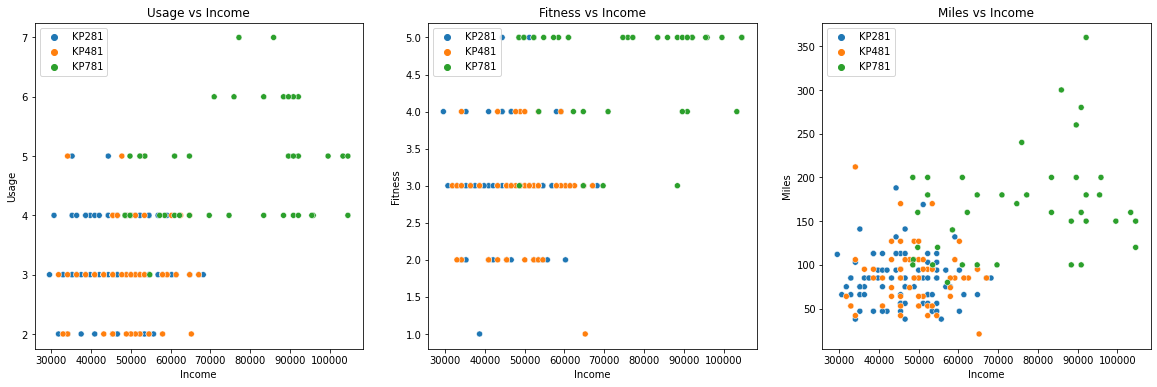

In [32]:
fif = plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.scatterplot(x = df_profile['Income'], y=df_profile['Usage'], hue = df_profile['Product'])
plt.legend(loc='upper left')
plt.title('Usage vs Income')
plt.subplot(1,3,2)
sns.scatterplot(x = df_profile['Income'], y=df_profile['Fitness'], hue = df_profile['Product'])
plt.legend(loc='upper left')
plt.title('Fitness vs Income')
plt.subplot(1,3,3)
sns.scatterplot(x = df_profile['Income'], y=df_profile['Miles'], hue = df_profile['Product'])
plt.legend(loc='upper left')
plt.title('Miles vs Income')
plt.show()

# Business Insights & Recommendations:

### Insights:

1. Aerofit has 3 treadmills models: KP281, KP481, KP781
    - KP281 is the highest selling product follwed by KP481 and KP781
2. Expected revenue by selling 1 Aerofit treadmill-
    (KP281_price * P[KP281]) + (KP481_price * P[KP481]) + (KP781_price * P[KP781])
    = 1500*0.444 + 1750*0.333 + 2500*0.222 = 1804 USD
3. Male customers are more than female customers, Also partnered customers are more than single customers
4. As per the analysis customer age range lies betwwen 20-35
5. Customer's annual income range between 30000-70000 USD
6. Customer profile for KP281 and KP481 are almost same
    - This is to be expected since the price difference b/w the 2 products is very less, However 
      some of the key difference b/w the profiles for KP281 and KP481 are:
        - Largest customer base: Partnered females for KP281 and Partnered males for KP481
        - Age of customers: customers across all age groups buy KP281 while KP481 is more preferred by those who are above 30
        - If we look at the number of customers in the Low Income bracket, we have:
            - 49% of KP281 buyers are in the Low Income bracket
            - 40% of KP481 buyers are in the Low Income bracket
            - Thus KP281 has a larger customer base in the Low Income category than KP481. However this is to be expected since               KP281 is the cheapest treadmill.
7. Customer profile for KP781 is different from the other 2 treadmills (vary cosylt comapre to other 2 models) It has been observered tha males dominate the customer base for KP781(Approx. 87%), female buyer merely 13%
  - Customers who buy KP781:
     - are already very fit
     - have a higher weekly usage for the treadmill
     - plan to walk/run a higher number of miles
     - have a higher annual income

### Recommendations:

1. Since KP281 is the highest selling product, It;s manufacturing should be increased and Priority should be highest
2. Since Partnered customers are more than the Single customers, there should some kind offer or some special gifts 
   for couple who bought the product, i.e. customised bottles
3. It is also observed that there is a sharp difference between the price of KP781 with nith KP281 & KP481
    - We can consider this and restructuring the price of KP781
    - By recducing the price of KP781, people willing to buy this model more and profit will increase
    - KP781 mainly brought by people who have higher Fitness level (4 and greater than 4 brackt) & people whos usage 4 or more times a day
    - Mostly People with Fitness level 3 and 4 & Usage category 2,3 and 4 are belongs to Low to medium income category, due
      to price constain they bought KP481 (refer to the below plot), If we price can managed then probably sell of KP781 will surely increse
        and it will be profitable
    - similar validation is visible for Miles and Usage
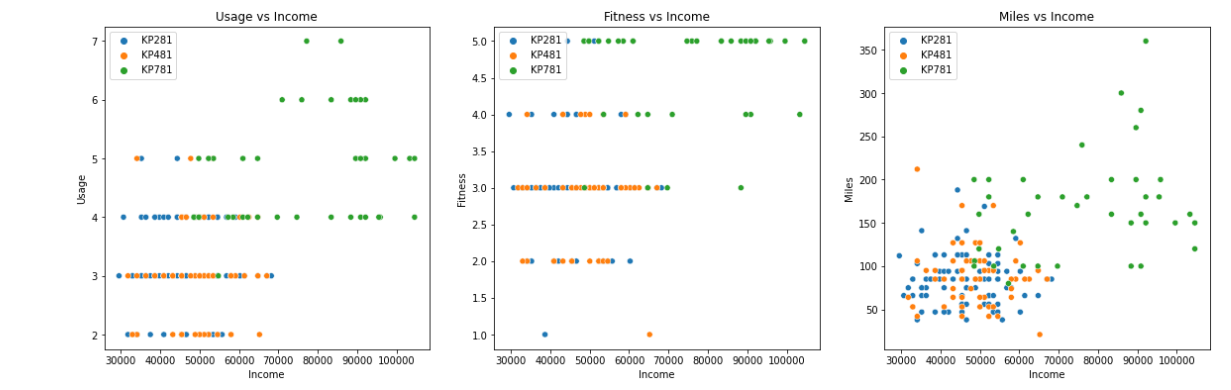

4. Since we observe that female customers are not likely buy KP781, company can provide some discounts and incentives to attract female customers
5. Aerofit should focus on Marketing as well, They should focus on spreading Health and Fitness awareness so that they reach out to a larger market and people may tend to but product from Aerofit which ultimetely leads to Profit for Aerofit

                                                   --------------- 